<a href="https://colab.research.google.com/github/SaidFayache/TP3-DataMining/blob/main/TP3_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **I - Jeux de données**

### **1-Iris**

In [ ]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',width=300, height=200)

In [ ]:
from sklearn import datasets
irisData = datasets.load_iris()
print (irisData.data)
print (irisData.target)

In [10]:
print("Le tableau de données est de dimension" , irisData.data.shape)

Le tableau de données est de dimension (150, 4)


Le tableau de données est de dimension (150, 4), donc on a 150 entrée dans notre dataset avec chaque entrée contenant 4 valeurs spécifiques ( qui permettent de définir le type d'iris)


In [21]:
import collections, numpy
print("On a", collections.Counter(irisData.target)[0], "données de classe 0 :", irisData.target_names[0])
print("On a", collections.Counter(irisData.target)[1], "données de classe 1 :", irisData.target_names[1])
print("On a", collections.Counter(irisData.target)[2], "données de classe 2 :", irisData.target_names[2])

On a 50 de données de classe 0 : setosa
On a 50 de données de classe 1 : versicolor
On a 50 de données de classe 2 : virginica


On a donc 50 donnée de classe 0 & 50 de classe 1 et 50 de classe 2 => total = 150 ( c'est le nombre de données dans le dataset)

In [23]:
print("le 32eme element a comme données", irisData.data[32], "et est de classe", irisData.target[32], "qui est la classe", irisData.target_names[irisData.target[32]])

le 32eme element a comme données [5.2 4.1 1.5 0.1] et est de classe 0 qui est la classe setosa


In [34]:
import matplotlib
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
  colors = cycle('rgbcmykw') # cycle de couleurs
  target_ids = range(len(target_names))
  pl.figure()
  for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
  pl.legend()
  pl.show()

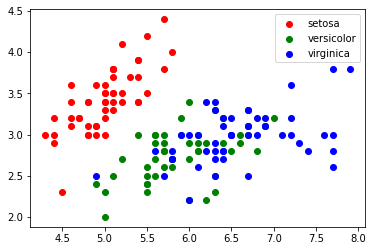

In [35]:
plot_2D(irisData.data,irisData.target,irisData.target_names)

## **II - Un premier apprentissage de classiffieur**

In [39]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
irisData = datasets.load_iris()
nb.fit(irisData.data[:-1], irisData.target[:-1])
p31 = nb.predict(irisData.data[31].reshape(1, -1))
print(p31) ## resultat : la prediction de la 32eme donnée
plast = nb.predict(irisData.data[-1].reshape(1, -1))
print(plast) # prediction de la derniere donnée dans le tableau d'entrée
p = nb.predict(irisData.data[:])
print(p) # la prediction de tous les données 

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

ce programme entraine le model sur 2/3 du dataset ( 0 -> 99) et test sur les 1/3 restants ( 100 -> 149 ), les resultats ne sont pas cohérants car les 50 dernieres données sont toutes de classe 2 et le model n'a été entrainé que sur des classes 0 ou 1 ( car tableau ordonné) donc il faudrait désordoner en meme temps les data et target puis diviser les données d'entrainement et de test pour que notre modele s'entraine sur des données differentes

## **III - Evaluer les performances d'un classiffieur**

In [48]:
def erreurAprentissage(data, target, predicted):
    ea = 0
    for i in range(len(data)):
        if (predicted[i] != target[i]):
            ea = ea+1
    print(ea / len(data))

In [49]:
def erreurAprentissage2(data, target, predicted):
    ea = (predicted-target != 0).sum()
    print(ea / len(data))

In [62]:
def erreurAprentissage3(clf, data, target):
    ea= 1 - clf.score(data, target)
    print(ea)
    

In [75]:
nb.fit(irisData.data[:-1], irisData.target[:-1])
data = irisData.data[:]
predicted = nb.predict(irisData.data[:])
target = irisData.target[:]

In [77]:
erreurAprentissage(data, target, predicted)
erreurAprentissage2(data, target, predicted)
erreurAprentissage3(nb, data, target)

0.03333333333333333
0.03333333333333333
0.033333333333333326


Pour notre cas, le model est overfitted car entrainé sur data - 1 valeur et testé sur toute la data => testSet ~= TrainingSet, c'est pour cela que l'erreur est minime ~ 0.03 